<a href="https://www.kaggle.com/code/chamodkalupahana/simple-dnn-model-cham-cirrhosis?scriptVersionId=155715839" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as layers # for creating model layers with less syntax

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


### Load in data

In [2]:
training_dataset = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")
testing_dataset = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")
training_dataset.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
training_dataset.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [4]:
x = training_dataset

### Convert categorical data to numberical

#### Replace values with binary

In [5]:
print('Possible Drug values: ',set(x['Drug']))
print('Possible Sex values: ',set(x['Sex']))
print('Possible Ascites values: ',set(x['Ascites']))
print('Possible Hepatomegaly values: ',set(x['Hepatomegaly']))
print('Possible Spiders values: ',set(x['Spiders']))
print('Possible Edema values: ',set(x['Edema']))
print('Possible Status values: ',set(x['Status']))

Possible Drug values:  {'Placebo', 'D-penicillamine'}
Possible Sex values:  {'M', 'F'}
Possible Ascites values:  {'N', 'Y'}
Possible Hepatomegaly values:  {'N', 'Y'}
Possible Spiders values:  {'N', 'Y'}
Possible Edema values:  {'N', 'S', 'Y'}
Possible Status values:  {'C', 'D', 'CL'}


In [6]:
x['Drug'].replace('D-penicillamine', 0, inplace=True)
x['Drug'].replace('Placebo', 1, inplace=True)

x['Sex'].replace('F', 0, inplace=True)
x['Sex'].replace('M', 1, inplace=True)

x['Ascites'].replace('N', 0, inplace=True)
x['Ascites'].replace('Y', 1, inplace=True)

x['Hepatomegaly'].replace('N', 0, inplace=True)
x['Hepatomegaly'].replace('S', 1, inplace=True)
x['Hepatomegaly'].replace('Y', 2, inplace=True)

x['Spiders'].replace('N', 0, inplace=True)
x['Spiders'].replace('Y', 1, inplace=True)

x['Edema'].replace('N', 0, inplace=True)
x['Edema'].replace('S', 1, inplace=True)
x['Edema'].replace('Y', 2, inplace=True)

#### Convert status column into 3 columns for each possiblity

In [7]:
status = x.pop('Status')

y = pd.DataFrame()

y['Status_C'] = (status == 'C').astype(int)
y['Status_CL'] = (status == 'CL').astype(int)
y['Status_D'] = (status == 'D').astype(int)

x.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,2,3428,1,13727,0,0,2,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,4,788,1,16658,0,0,2,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0


In [8]:
y.head()

,Status_C,Status_CL,Status_D
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


#### Repeat for testing dataset

In [9]:
# duplicate original dataset and make changes on duplicate
test_dataset = testing_dataset

test_dataset['Drug'].replace('D-penicillamine', 0, inplace=True)
test_dataset['Drug'].replace('Placebo', 1, inplace=True)

test_dataset['Sex'].replace('F', 0, inplace=True)
test_dataset['Sex'].replace('M', 1, inplace=True)

test_dataset['Ascites'].replace('N', 0, inplace=True)
test_dataset['Ascites'].replace('Y', 1, inplace=True)

test_dataset['Hepatomegaly'].replace('N', 0, inplace=True)
test_dataset['Hepatomegaly'].replace('S', 1, inplace=True)
test_dataset['Hepatomegaly'].replace('Y', 2, inplace=True)

test_dataset['Spiders'].replace('N', 0, inplace=True)
test_dataset['Spiders'].replace('Y', 1, inplace=True)

test_dataset['Edema'].replace('N', 0, inplace=True)
test_dataset['Edema'].replace('S', 1, inplace=True)
test_dataset['Edema'].replace('Y', 2, inplace=True)

test_dataset.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,0,19724,0,0,2,0,0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,0,14975,0,0,0,0,0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,1,13149,0,0,2,0,2,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,0,20510,0,0,0,0,0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,0,21904,0,0,2,0,0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


### Define DNN model

In [10]:
def get_widths_from_arange(start=10, end=0):
    # automatically create wdiths list with start and end values
    widths_array = np.arange(start, end, -1)
    widths = [2**x for x in widths_array]
    return widths

def dense_block(width):
    def apply(dx):
        dx = layers.Dense(width, activation='relu')(dx)
        return dx
    return apply

def get_dense_network(widths):
    input_shape = x.shape[1]
    input_layer = layers.Input(input_shape)
    
    dx = layers.Dense(widths[0], activation='relu')(input_layer)
    
    for width in widths:
        if width != widths[0]:
            dx = dense_block(width)(dx)
        
    output_layer = layers.Dense(3, activation='sigmoid')(dx)
    return tf.keras.Model(inputs=input_layer, outputs=output_layer)


# define widths of dense layers

## manually create widths list
#widths = [16, 8, 4]
widths = get_widths_from_arange(10, 2)

model = get_dense_network(widths)

loss_function = tf.keras.losses.BinaryCrossentropy()
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001) # changed from 0.001
model.compile(loss = loss_function, optimizer=optimiser, metrics=['mae'])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 1024)              20480     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080  

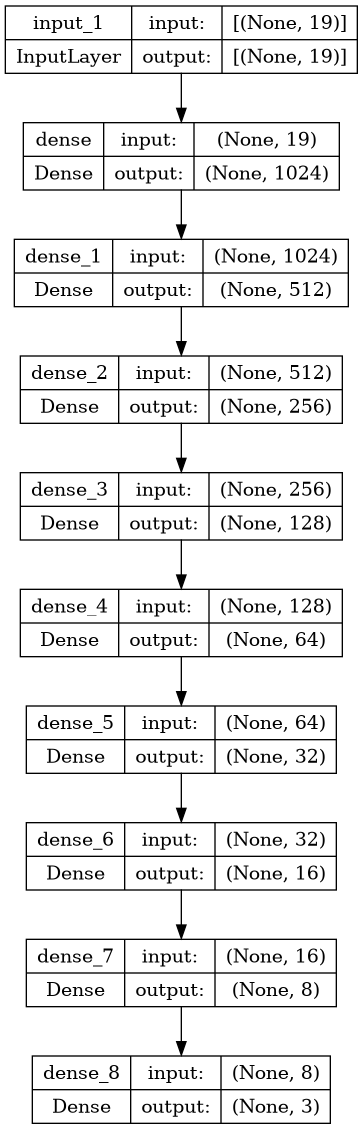

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Train model

In [13]:
model.fit(x, y, epochs=50)

Epoch 1/50
248/248 [==============================] - 10s 4ms/step - loss: 1.2893 - mae: 0.4955
Epoch 2/50
248/248 [==============================] - 1s 4ms/step - loss: 0.7127 - mae: 0.4961
Epoch 3/50
248/248 [==============================] - 1s 4ms/step - loss: 0.6818 - mae: 0.4942
Epoch 4/50
248/248 [==============================] - 1s 4ms/step - loss: 0.6768 - mae: 0.4915
Epoch 5/50
248/248 [==============================] - 1s 4ms/step - loss: 0.8222 - mae: 0.4918
Epoch 6/50
248/248 [==============================] - 1s 4ms/step - loss: 0.6669 - mae: 0.4863
Epoch 7/50
248/248 [==============================] - 1s 4ms/step - loss: 0.6621 - mae: 0.4836
Epoch 8/50
248/248 [==============================] - 1s 5ms/step - loss: 0.6573 - mae: 0.4809
Epoch 9/50
248/248 [==============================] - 1s 4ms/step - loss: 0.6527 - mae: 0.4782
Epoch 10/50
248/248 [==============================] - 1s 4ms/step - loss: 0.6482 - mae: 0.4756
Epoch 11/50
248/248 [===========================

### Create submission

In [14]:
predictions = model.predict(testing_dataset)

165/165 [==============================] - 0s 2ms/step


In [15]:
submission = pd.DataFrame()
submission['id'] = test_dataset['id']

submission['Status_C'] = predictions[:, 0]
submission['Status_CL'] = predictions[:, 1]
submission['Status_D'] = predictions[:, 2]

submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.6186,0.240706,0.351581
1,7906,0.6186,0.240706,0.351581
2,7907,0.6186,0.240706,0.351581
3,7908,0.6186,0.240706,0.351581
4,7909,0.6186,0.240706,0.351581


In [16]:
submission.describe()

,id,Status_C,Status_CL,Status_D
count,5271.000000,5271.000000,5271.000000,5271.000000
mean,10540.000000,0.618289,0.240902,0.351896
std,1521.750965,0.009638,0.007428,0.010485
min,7905.000000,0.226830,0.240706,0.351581
25%,9222.500000,0.618600,0.240706,0.351581
50%,10540.000000,0.618600,0.240706,0.351581
75%,11857.500000,0.618600,0.240706,0.351581
max,13175.000000,0.618600,0.697401,0.811460


In [17]:
submission.to_csv('/kaggle/working/submission.csv',index=False,header=True)